In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("ice_cream.csv")

In [4]:
price_unit = (data["price_paid_deal"]+data["price_paid_non_deal"])/data["quantity"]
data_price = pd.concat([data,price_unit],axis=1)
data_price = data_price.rename(columns={0:"price_unit"})

In [36]:
data_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21974 entries, 0 to 21973
Data columns (total 38 columns):
quantity                         21974 non-null int64
price_paid_deal                  21974 non-null float64
price_paid_non_deal              21974 non-null float64
coupon_value                     21974 non-null float64
promotion_type                   8994 non-null float64
total_spent                      21974 non-null float64
size1_descr                      21974 non-null object
flavor_descr                     21974 non-null object
formula_descr                    21974 non-null object
household_id                     21974 non-null int64
household_size                   21974 non-null int64
household_income                 21974 non-null int64
age_of_female_head               21974 non-null int64
age_of_male_head                 21974 non-null int64
age_and_presence_of_children     21974 non-null int64
male_head_employment             21974 non-null int64
female_head_emp

In [9]:
data_price["household_size"].unique()

array([2, 1, 3, 4, 5, 7, 6, 8, 9])

In [35]:
data_price["price_unit"].max()

9.48

In [34]:
data[(data_price["price_unit"]==0)]

,quantity,price_paid_deal,price_paid_non_deal,coupon_value,promotion_type,total_spent,size1_descr,flavor_descr,formula_descr,household_id,...,projection_factor,fips_state_code,fips_county_code,census_tract_county_code,type_of_residence,kitchen_appliances,tv_items,female_head_birth,male_head_birth,household_internet_connection
2423,1,0.0,0.0,0.0,NaN,113.71,16.0 MLOZ,PUMPKIN CSK,REGULAR,30053675,...,6288,22,55,1901.0,1,4,2.0,1/1/76,10/1/74,1
10866,1,0.0,0.0,0.0,NaN,27.70,16.0 MLOZ,ONE CSK BROWNIE,REGULAR,30137726,...,2938,9,9,165801.0,6,4,2.0,10/1/69,NaN,1


In [17]:
Q1 = np.quantile(data_price["price_unit"],0.25)
Q3 = np.quantile(data_price["price_unit"],0.75)
IQR = Q3 - Q1

In [28]:
len(data_price[(data_price["price_unit"] > (Q3 + IQR*1.5))])

1315

In [29]:
len(data_price[(data_price["price_unit"] < (Q1 - IQR*1.5))])

635

In [4]:
price_unit_by_flavor = data_price.groupby("flavor_descr").mean()["price_unit"].sort_values(ascending=False)[:5]
price_unit_by_flavor

flavor_descr
WHITE RUSSIAN            4.190000
STR                      3.686364
SWEET CREAM & COOKIES    3.651176
COFFEE                   3.574286
VAN                      3.508951
Name: price_unit, dtype: float64

([<matplotlib.axis.XTick at 0x11806cb10>,
 <a list of 5 Text xticklabel objects>)

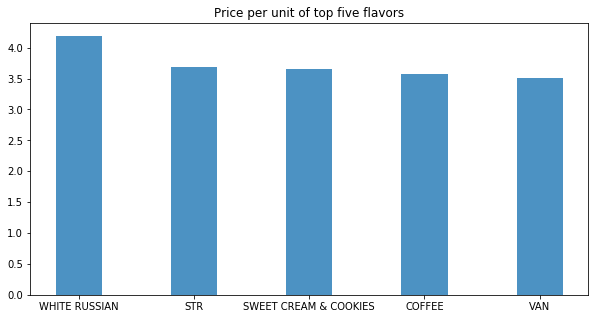

In [5]:
plt.figure(figsize=(10,5))
plt.title("Price per unit of top five flavors")
loc = [1,2,3,4,5]
plt.bar(loc,price_unit_by_flavor,width=0.4,align='center',alpha=0.8)
plt.xticks(loc,price_unit_by_flavor.index)

In [36]:
price_unit_by_household_size = data_price.groupby("household_size")["price_unit"].quantile(0.9).sort_values(ascending=False)
price_unit_by_household_size


household_size
2    4.190
1    4.190
7    3.990
6    3.990
5    3.990
4    3.990
3    3.990
8    3.976
9    3.890
Name: price_unit, dtype: float64

([<matplotlib.axis.XTick at 0x124f0a710>,
 <a list of 9 Text xticklabel objects>)

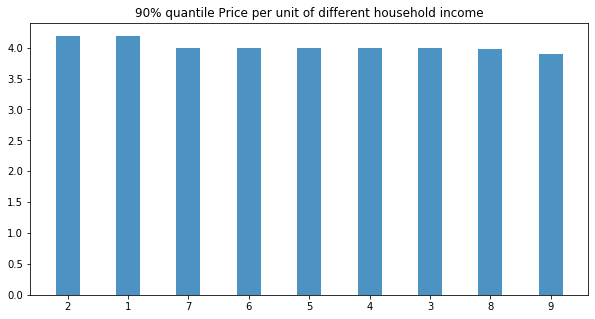

In [37]:
plt.figure(figsize=(10,5))
plt.title("90% quantile Price per unit of different household income")
loc = list(range(len(price_unit_by_household_size)))
plt.bar(loc,price_unit_by_household_size,width=0.4,align='center',alpha=0.8)
plt.xticks(loc,price_unit_by_household_size.index)

In [33]:
price_unit_by_household_income = data_price.groupby("household_income")["price_unit"].quantile(0.9).sort_values(ascending=False)
price_unit_by_household_income

household_income
28    4.490
6     4.460
27    4.250
10    4.220
29    4.190
13    4.190
19    4.120
21    4.090
16    4.066
30    4.000
26    4.000
11    3.990
8     3.990
17    3.990
15    3.990
18    3.990
23    3.990
3     3.990
4     3.751
Name: price_unit, dtype: float64

([<matplotlib.axis.XTick at 0x124d9c1d0>,
 <a list of 19 Text xticklabel objects>)

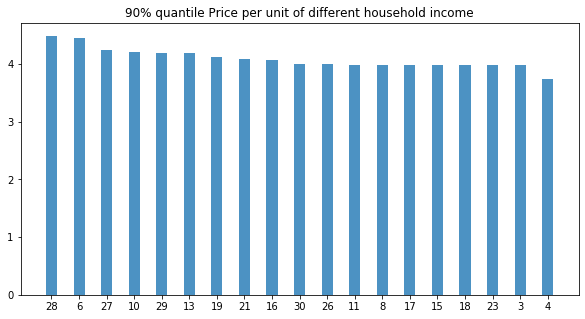

In [35]:
plt.figure(figsize=(10,5))
plt.title("90% quantile Price per unit of different household income")
loc = list(range(len(price_unit_by_household_income)))
plt.bar(loc,price_unit_by_household_income,width=0.4,align='center',alpha=0.8)
plt.xticks(loc,price_unit_by_household_income.index)

In [8]:
price_unit_by_race = data_price.groupby("race").mean()["price_unit"].sort_values(ascending=False)[:5]
price_unit_by_race

race
4    3.379076
2    3.363364
3    3.361332
1    3.306233
Name: price_unit, dtype: float64

([<matplotlib.axis.XTick at 0x11870dbd0>,
 <a list of 4 Text xticklabel objects>)

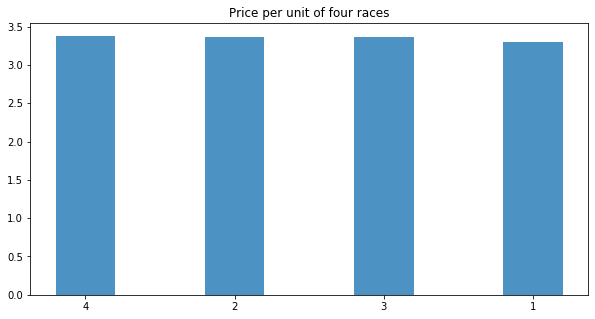

In [9]:
plt.figure(figsize=(10,5))
plt.title("Price per unit of four races")
loc = [1,2,3,4]
plt.bar(loc,price_unit_by_race,width=0.4,align='center',alpha=0.8)
plt.xticks(loc,price_unit_by_race.index)

(array([  1.,   1.,   2.,   2.,   1.,  11.,  10.,   6.,  53.,  18.,  20.,
         98.,  36.,  63., 122.,  25.,  60.,   2.,  12.,  38.,   3.,   1.,
          8.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([1.07   , 1.24275, 1.4155 , 1.58825, 1.761  , 1.93375, 2.1065 ,
        2.27925, 2.452  , 2.62475, 2.7975 , 2.97025, 3.143  , 3.31575,
        3.4885 , 3.66125, 3.834  , 4.00675, 4.1795 , 4.35225, 4.525  ,
        4.69775, 4.8705 , 5.04325, 5.216  , 5.38875, 5.5615 , 5.73425,
        5.907  , 6.07975, 6.2525 , 6.42525, 6.598  , 6.77075, 6.9435 ,
        7.11625, 7.289  , 7.46175, 7.6345 , 7.80725, 7.98   ]),
 <a list of 40 Patch objects>)

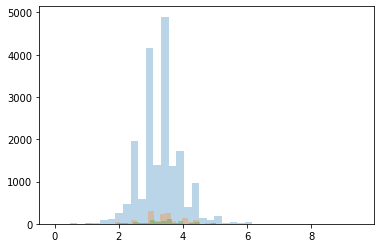

In [10]:
plt.hist(data_price["price_unit"][(data_price["race"]==1)],bins=40,alpha=0.3)
plt.hist(data_price["price_unit"][(data_price["race"]==2)],bins=40,alpha=0.3)
plt.hist(data_price["price_unit"][(data_price["race"]==3)],bins=40,alpha=0.3)